In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hypertools as hyp
%matplotlib inline

In [30]:
data = pd.read_csv(r'C:\Users\jesse.pisel\Downloads\wsgs-2017-ofr-02\tables.csv')
d2 = data.iloc[0:, 0:-3]
d2=d2.dropna()

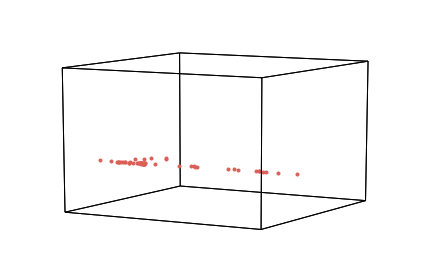

In [31]:
hyp.plot(d2, '.')

In [42]:
xx = d2.drop(['api', 'company','3months', '6months', '9months', 'res', '12months', 'ip'
       ], axis=1)
yy = d2['12months'].values

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(xx, yy, test_size=0.1, random_state=86)

In [44]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [47]:
feat_labels = xx.columns.values
feature = list(zip(feat_labels, rf.feature_importances_))
sorted(feature, key=lambda tup: tup[1])


[('api.1', 0.002055057398817833),
 ('latitude', 0.009629608652840543),
 ('length', 0.01392868353748707),
 ('bhlong', 0.014551541000980644),
 ('gor', 0.01573770706939428),
 ('stages', 0.017025119831760516),
 ('year', 0.01795243873064916),
 ('longitude', 0.03462223621109773),
 ('az', 0.03486105051922976),
 ('slurry', 0.03675459965292295),
 ('bhlat', 0.10792580541638722),
 ('proppant', 0.6949561519784323)]

In [46]:
a = np.array(sorted(feature))[:,0]
b  = np.array(sorted(feature))[:,1]
#print('\n'.join(map(str, a)))
print('\n'.join(map(str, b)))
print('\n'.join(map(str, a)))

0.002055057398817833
0.03486105051922976
0.10792580541638722
0.014551541000980644
0.01573770706939428
0.009629608652840543
0.01392868353748707
0.03462223621109773
0.6949561519784323
0.03675459965292295
0.017025119831760516
0.01795243873064916
api.1
az
bhlat
bhlong
gor
latitude
length
longitude
proppant
slurry
stages
year
